In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dataset=pd.read_csv('Bike_Data.csv')
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_1485720510a64626bb2070f725aca1f7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JKandmZufMQNLxmkoOz21y958q6KafMgjKY6Sq6_bAWB',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1485720510a64626bb2070f725aca1f7.get_object(Bucket='bikebuyerpredictionmodel-donotdelete-pr-kdjjph2d2pcssq',Key='Bike_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset= pd.read_csv(body)


In [3]:
dataset.head()

,id,Marital Status,Gender,Yearly Income,Children,Home Owner,Cars,Age,BikeBuyer
0,22711,Single,Male,30000,0,No,1,33,Yes
1,13555,Married,Female,40000,0,Yes,0,37,Yes
2,28907,Married,Male,160000,5,No,3,55,No
3,25410,Single,Female,70000,2,No,1,38,Yes
4,15756,Single,Female,70000,0,Yes,2,49,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset.iloc[:,1]=lb.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,2]=lb.fit_transform(dataset.iloc[:,2])
dataset.iloc[:,5]=lb.fit_transform(dataset.iloc[:,5])
dataset.iloc[:,-1]=lb.fit_transform(dataset.iloc[:,-1])
dataset.head(10)

,id,Marital Status,Gender,Yearly Income,Children,Home Owner,Cars,Age,BikeBuyer
0,22711,1,1,30000,0,0,1,33,1
1,13555,0,0,40000,0,1,0,37,1
2,28907,0,1,160000,5,0,3,55,0
3,25410,1,0,70000,2,0,1,38,1
4,15756,1,0,70000,0,1,2,49,1
5,11085,1,0,60000,0,0,2,49,0
6,17974,0,0,30000,1,1,0,38,1
7,21008,1,0,20000,1,0,0,46,1
8,28985,1,1,50000,0,0,2,64,0
9,11087,0,0,70000,2,0,0,49,0


In [5]:
dataset.corr()

,id,Marital Status,Gender,Yearly Income,Children,Home Owner,Cars,Age,BikeBuyer
id,1.000000,0.198724,0.030530,-0.206521,-0.107024,-0.089037,-0.217991,-0.208433,0.639732
Marital Status,0.198724,1.000000,-0.149682,-0.154429,-0.176235,-0.308947,0.050298,-0.169873,0.218950
Gender,0.030530,-0.149682,1.000000,0.014182,0.079023,0.028509,0.041214,0.038427,0.055908
Yearly Income,-0.206521,-0.154429,0.014182,1.000000,0.481361,0.041085,0.480507,0.182494,-0.255288
Children,-0.107024,-0.176235,0.079023,0.481361,1.000000,0.188341,0.421013,-0.040872,-0.195497
Home Owner,-0.089037,-0.308947,0.028509,0.041085,0.188341,1.000000,-0.068382,0.242398,-0.043804
Cars,-0.217991,0.050298,0.041214,0.480507,0.421013,-0.068382,1.000000,0.234240,-0.287107
Age,-0.208433,-0.169873,0.038427,0.182494,-0.040872,0.242398,0.234240,1.000000,-0.323385
BikeBuyer,0.639732,0.218950,0.055908,-0.255288,-0.195497,-0.043804,-0.287107,-0.323385,1.000000


In [6]:
x=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1:].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [10]:
y_test

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [24]:
rf.predict([[1,170000,5,1,5,70]])

array([0])

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rf)
cm

array([[36, 11],
       [13, 31]])

In [13]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_rf)
roc_auc_rf=metrics.auc(fpr,tpr)

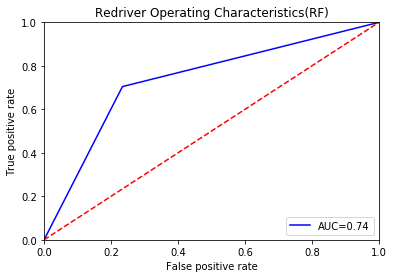

In [14]:
plt.title('Redriver Operating Characteristics(RF)')
plt.plot(fpr,tpr,'b',label="AUC=%0.2f"%roc_auc_rf)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [15]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-06-20 09:11:37,197 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [16]:
wml_credentials={
    "url": "https://eu-gb.ml.cloud.ibm.com",
    "access_key":"-fJT_Ar2F1E0vy1-vE0azrQ0-xdVofIX9zyHl-NnrNEg",
    "instance_id": "b3c472d8-162d-4833-bbb8-30814e61c24f",
  "password": "f5135481-99cc-4bd1-a5a8-21750e0985de",
  "username": "c8b7f9af-5e52-446a-8402-d904ba014544"
}

In [17]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [18]:
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:"IBM",
             client.repository.ModelMetaNames.AUTHOR_EMAIL:"ibm@ibm.com",
             client.repository.ModelMetaNames.NAME:"Random Forest Classifier"}

In [19]:
model_artifact=client.repository.store_model(rf,meta_props=model_props)

In [20]:
published_model_uid=client.repository.get_model_uid(model_artifact)

In [21]:
created_deployment=client.deployments.create(published_model_uid,name="Random Forest Classifier")



#######################################################################################

Synchronous deployment creation for uid: 'b2aed1c4-54b7-4746-8755-9f84d19dcff4' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5add48ab-ae0a-49b3-833b-361a3754f286'
------------------------------------------------------------------------------------------------




In [22]:
scoring_endpoint=client.deployments.get_scoring_url(created_deployment)

In [23]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/b3c472d8-162d-4833-bbb8-30814e61c24f/deployments/5add48ab-ae0a-49b3-833b-361a3754f286/online'